In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR="."
CHAPTER_ID="svm"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
import pandas as pd

file_path="D:/study/ml/数据/ae信号/dfnc_sheet2.xlsx"
df=pd.read_excel(file_path)

In [3]:
y=df['BQ']
df2=df.drop(['BQ','LL','LL2'],axis=1)
df2=np.array(df2)

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X=df2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Train=np.insert(X_train,0,values=y_train,axis=1)
Train=pd.DataFrame(Train)
Train.columns = ['BQ','X_train','y_train']
Train.to_excel('Sheet2_train.xlsx',index = False)
Test=np.insert(X_test,0,values=y_test,axis=1)
Test=pd.DataFrame(Test)
Test.columns=['BQ','X_test','y_test']
Test.to_excel('Sheet2_test.xlsx',index=False)

svm_clf=SVC(kernel="linear")
svm_clf_fit=svm_clf.fit(X,y)

In [21]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 1568)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    print((-w[0]/w[1]))
    print(-b/w[1])
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_

    plt.scatter(svs[:, 0], svs[:, 1], s=4, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
#     plt.plot(x0, gutter_up, "k--", linewidth=2)
#     plt.plot(x0, gutter_down, "k--", linewidth=2)

12.881652900952433
-35.92709816324288
Saving figure svm_sheet2


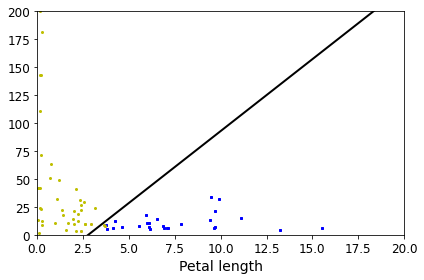

In [24]:
plot_svc_decision_boundary(svm_clf, 0, 20)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs",markersize=2)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo",markersize=2)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 20, 0, 200])

save_fig("svm_sheet2")
plt.show()